In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
def load_iris():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # Use first two features for visualization
    y = iris.target
    return X, y

In [4]:
def compute_class_parameters(X, y):
    classes = np.unique(y)
    means = {}
    covariances = {}
    priors = {}
    
    for c in classes:
        X_c = X[y == c]
        means[c] = np.mean(X_c, axis=0)
        covariances[c] = np.cov(X_c, rowvar=False)
        priors[c] = len(X_c) / len(X)
    
    return means, covariances, priors

In [5]:
def qda_decision_function(X, means, covariances, priors):
    n_samples = X.shape[0]
    n_classes = len(means)
    scores = np.zeros((n_samples, n_classes))
    
    for c in means:
        mean = means[c]
        cov = covariances[c]
        prior = priors[c]
        
        cov_inv = np.linalg.inv(cov)
        cov_det = np.linalg.det(cov)
        
        for i in range(n_samples):
            diff = X[i] - mean
            scores[i, c] = -0.5 * np.log(cov_det) - 0.5 * diff.T @ cov_inv @ diff + np.log(prior)
    
    return np.argmax(scores, axis=1)

In [6]:
def plot_decision_boundary(X, y, means, covariances, priors):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = qda_decision_function(grid_points, means, covariances, priors)
    predictions = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('QDA Decision Boundary')
    plt.show()

In [7]:
# Load data and train QDA
X, y = load_iris()
means, covariances, priors = compute_class_parameters(X, y)
y_pred = qda_decision_function(X, means, covariances, priors)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.00%


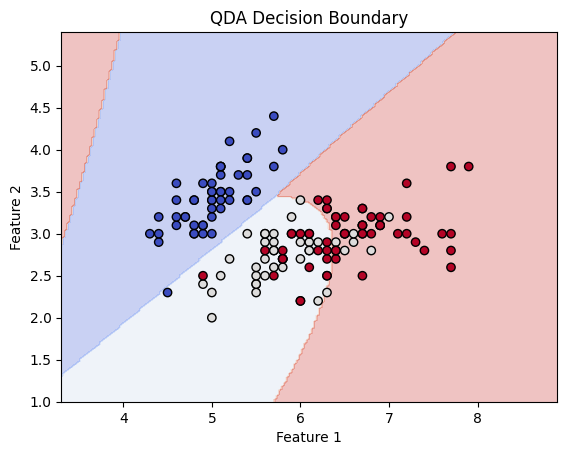

In [8]:
# Plot decision boundary
plot_decision_boundary(X, y, means, covariances, priors)
